<!-- Notebook Header Start -->

<h1 align="center">Running Kilosort & Analyzing Data</h1>

<p align="center">
  <strong>Author:</strong> Karl Bates<br>
  <strong>Date:</strong> 2024-11-18<br>
  <strong>Affiliation:</strong> Carnegie Mellon University, Cohen-Karni Lab  || Neuromechatronics Lab
</p>

---


## 📊 Notebook Outline

* **Importing binary files from SpikeInterface**
* **Running Kilosort spike sorting on the datasets of interest**
* **Importing the results of Kilosort back into Python for analysis / plotting**


## 📚 References & Additional Resources

- [Kilosort4 docs](https://github.com/MouseLand/Kilosort/tree/main)
- [SpikeInterface docs](https://github.com/SpikeInterface)

---

<!-- Notebook Header End -->


# 🧾 Importing Libraries & Data
---

### import libraries

In [1]:
# standard imports
from pathlib import Path
import os
import pandas as pd
import numpy as np
from kilosort import io
import matplotlib.pyplot as plt

# custom imports
from automations import RM1
from automations import SpikeInterface_wrapper
from automations import Kilosort_wrapper
from automations import plots

### filepath & probe definition

Using the spreadsheet, `Adapter_pinout.xlsx`, the contact ID's can be traced to the "device channel", and we can assign them on the probe. 

In this case, our channel indices correspond to the aux inputs to the intan headstage.

refer to the notebook, `RM1_pipeline.ipynb` within  the `dev_notebook` folder

In [2]:
# Path definitions
SAVE_DIRECTORY = Path(fr'D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
DATA_DIRECTORY = Path(fr'D:\Data\CMU.80 Data\82 External Data\82.002 Sample Rat Data from RM1 Project')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
# Create path if it doesn't exist
DATA_DIRECTORY.mkdir(parents=True, exist_ok=True)
SAVE_DIRECTORY.mkdir(parents=True, exist_ok=True)
PROBE_DIRECTORY = Path(r'D:\Data\CMU.80 Data\88 Analyzed Data\88.001 A1x32-Edge-5mm-20-177-A32\A1x32-Edge-5mm-20-177-A32.prb')

# 📈 Trial Summary
---

This is used to determine which trial is most likely to produce good units in a spike sorting analysis

### process data for import into Kilosort

I will use a combination of `SpikeInterface` & `Kilosort.io.extractors` to get the data I need

In [3]:
spikes = Kilosort_wrapper(SAVE_DIRECTORY,PROBE_DIRECTORY)

Preparing Kilosort wrapper...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\DRGS_10_240911_155921\DW323_DRGS_10_240911_155921_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------------

|
|
|
|
|
|
Running kilosort on DRGS_10_240911_155921
|
|
|
|
|
|


kilosort.run_kilosort: N samples: 8650496
kilosort.run_kilosort: N seconds: 288.3498666666667
kilosort.run_kilosort: N batches: 145
kilosort.run_kilosort: Preprocessing filters computed in  0.50s; total  0.50s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    16.30 %
kilosort.run_kilosort: Memory:       63.76 %     |     30.56   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   14.22 %     |      1.14   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     1.47 %     |      0.12   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilo

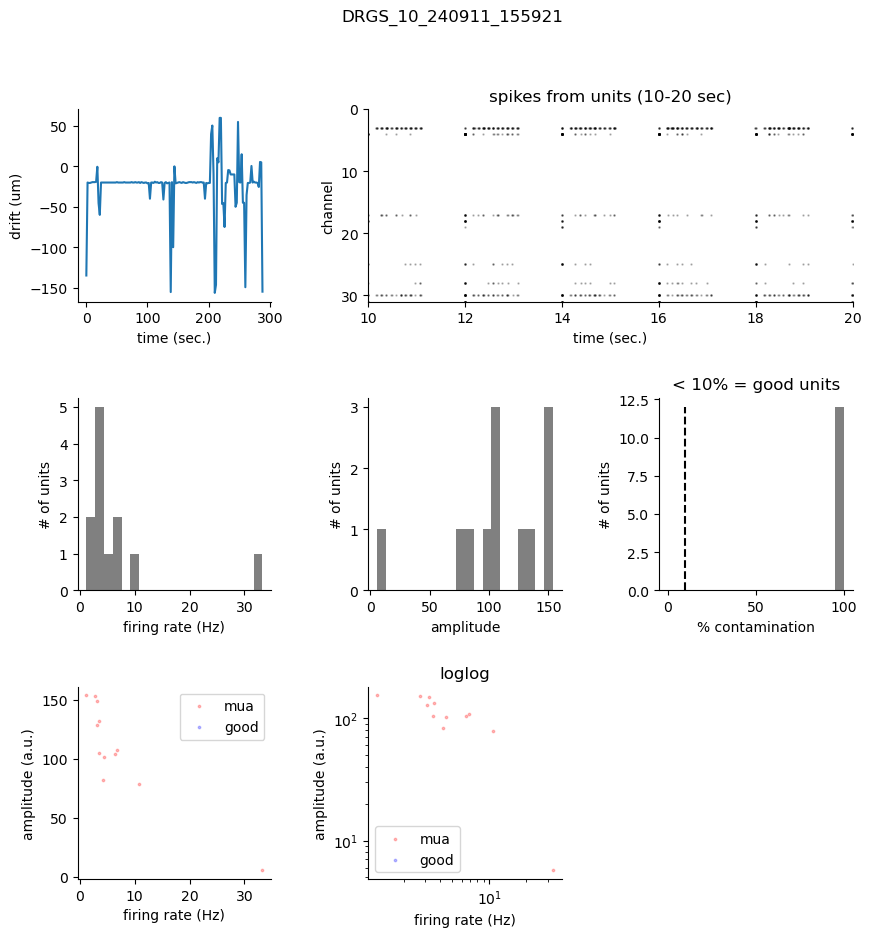

ERROR: could not plot units for DRGS_10_240911_155921, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\DRGS_11_240911_160638\DW323_DRGS_11_240911_160638_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------------

ERROR: could not plot units for DRGS_10_240911_155921, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on DRGS_11_240911_160638
|
|
|
|
|
|


kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    21.50 %
kilosort.run_kilosort: Memory:       64.06 %     |     30.71   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     2.12 %     |      0.17   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.spikedetect: Re-computing universal templates from data.
kilosort.spikedetect: Number of universal temp

<Figure size 1800x450 with 0 Axes>

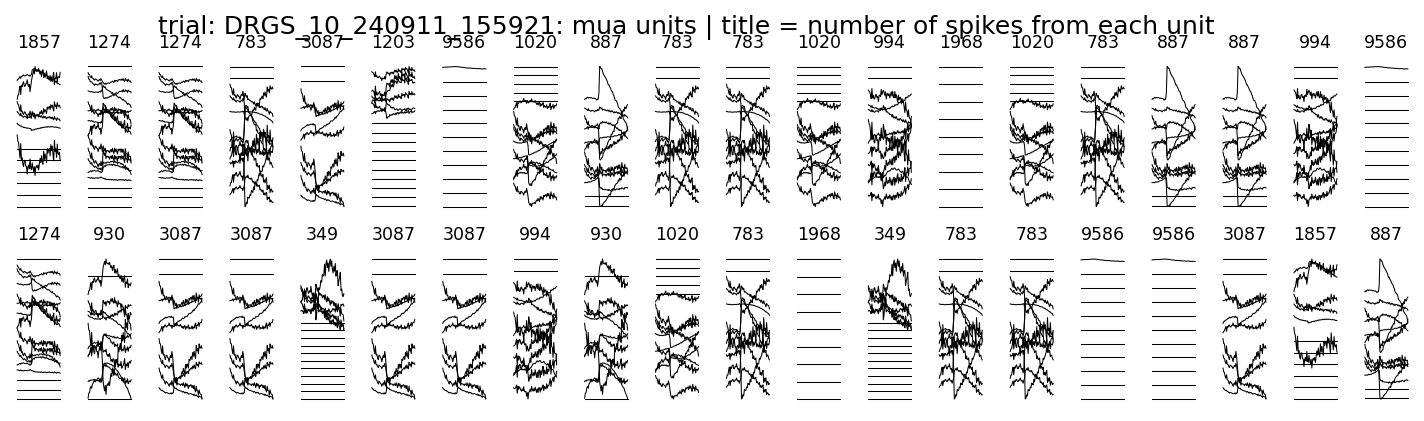

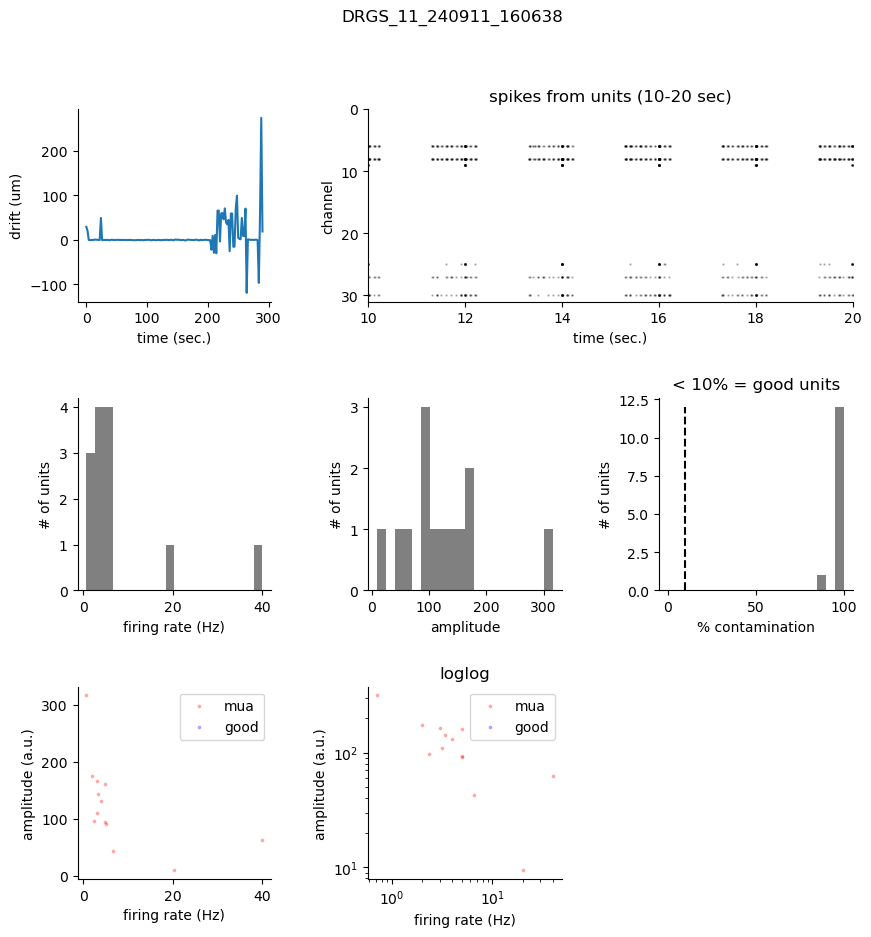

ERROR: could not plot units for DRGS_11_240911_160638, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\DRGS_1_240911_144910\DW323_DRGS_1_240911_144910_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ---------------------------------------

ERROR: could not plot units for DRGS_11_240911_160638, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on DRGS_1_240911_144910
|
|
|
|
|
|


kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 130/130 [00:09<00:00, 14.35it/s]
kilosort.run_kilosort: drift computed in  9.55s; total  9.69s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after drift correction
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    26.40 %
kilosort.run_kilosort: Memory:       63.89 %     |     30.62   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     2.12 %     |      0.17   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_k

<Figure size 1800x450 with 0 Axes>

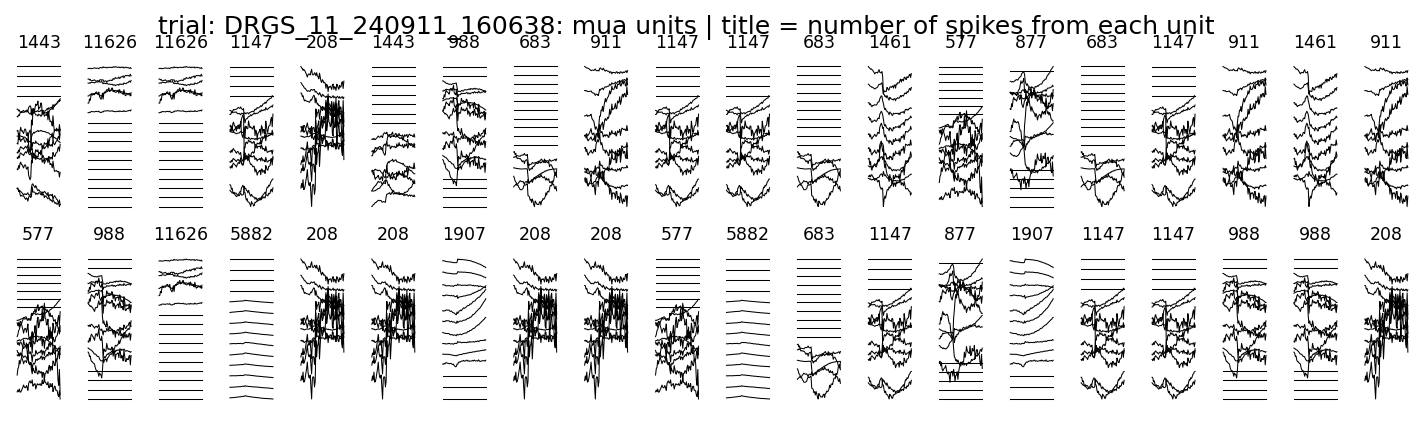

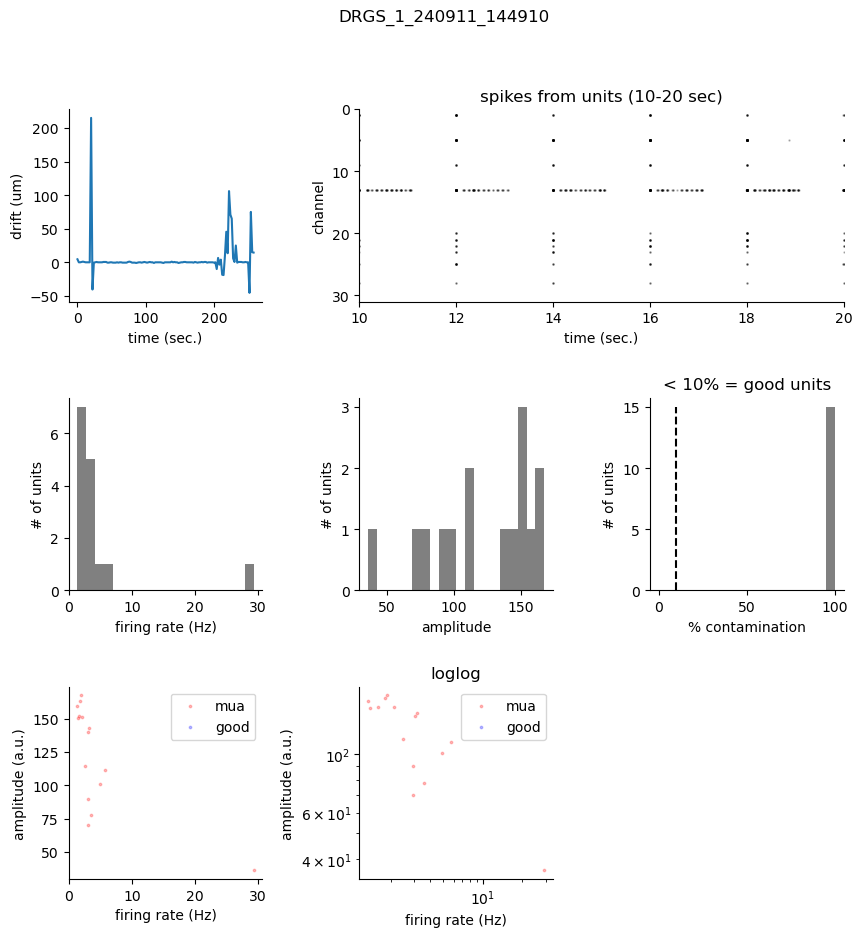

ERROR: could not plot units for DRGS_1_240911_144910, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\DRGS_2_240911_145808\DW323_DRGS_2_240911_145808_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ---------------------------------------

ERROR: could not plot units for DRGS_1_240911_144910, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on DRGS_2_240911_145808
|
|
|
|
|
|


kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 130/130 [00:09<00:00, 14.31it/s]
kilosort.run_kilosort: drift computed in  9.59s; total  9.74s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after drift correction
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    30.60 %
kilosort.run_kilosort: Memory:       64.20 %     |     30.77   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     2.12 %     |      0.17   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_k

<Figure size 1800x450 with 0 Axes>

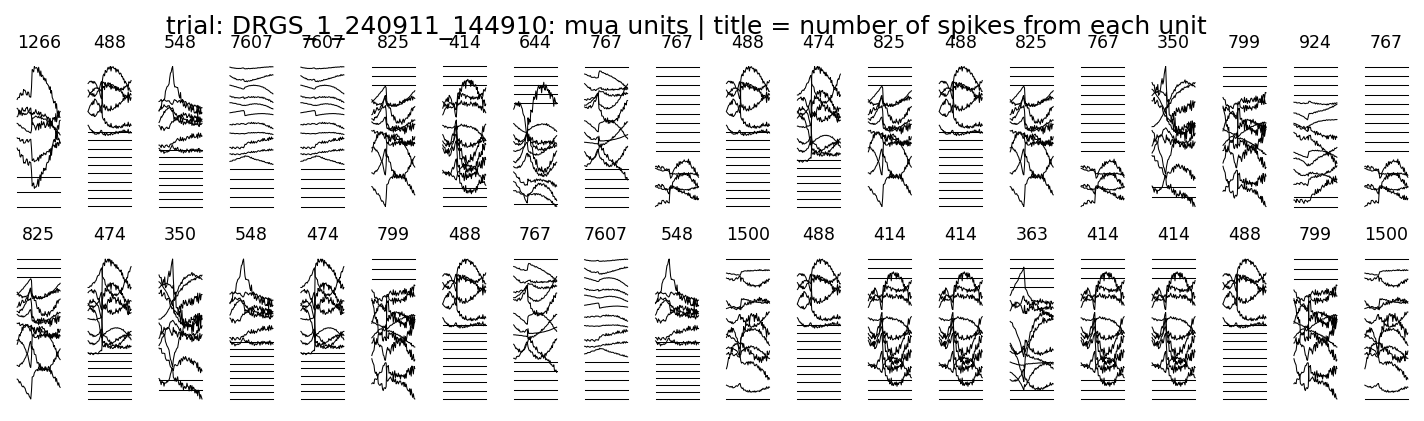

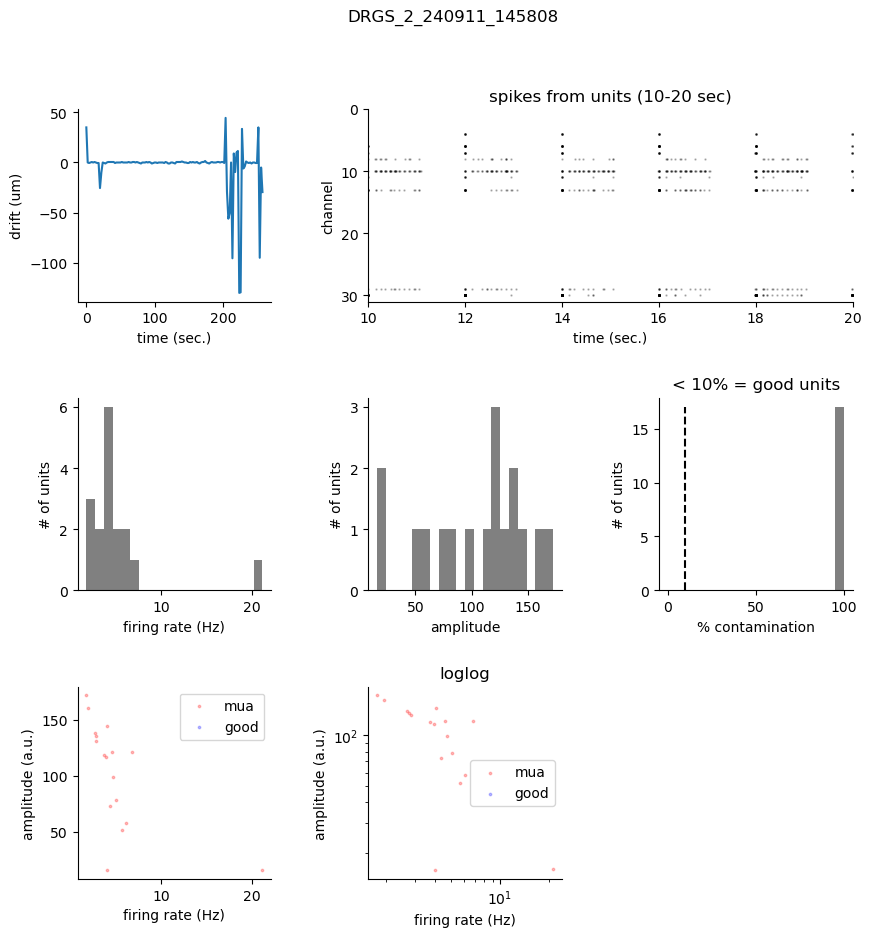

ERROR: could not plot units for DRGS_2_240911_145808, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\DRGS_3_240911_150506\DW323_DRGS_3_240911_150506_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ---------------------------------------

ERROR: could not plot units for DRGS_2_240911_145808, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on DRGS_3_240911_150506
|
|
|
|
|
|


kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 130/130 [00:09<00:00, 14.33it/s]
kilosort.run_kilosort: drift computed in  9.57s; total  9.72s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after drift correction
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    24.10 %
kilosort.run_kilosort: Memory:       64.35 %     |     30.85   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     2.12 %     |      0.17   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_k

<Figure size 1800x450 with 0 Axes>

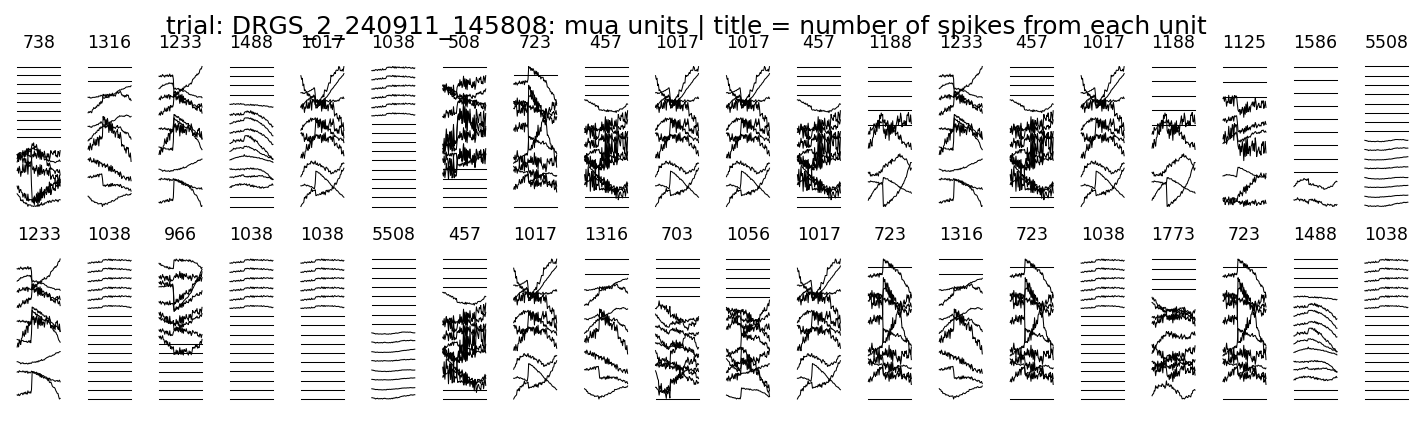

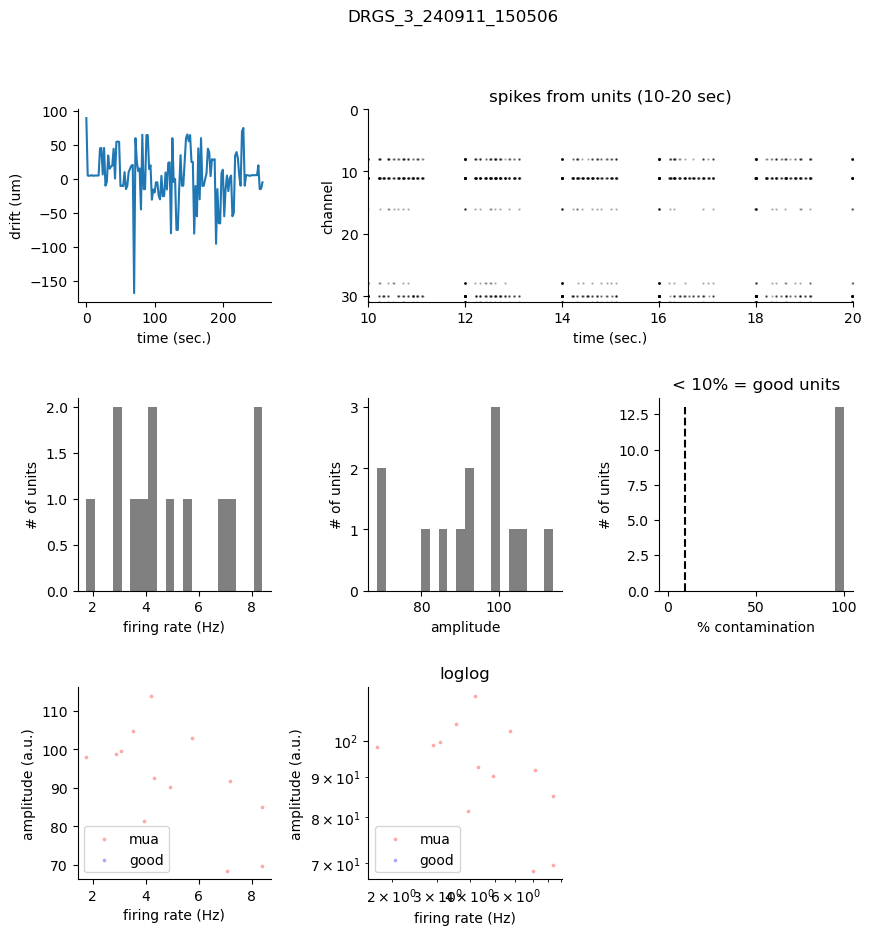

ERROR: could not plot units for DRGS_3_240911_150506, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\DRGS_4_240911_151137\DW323_DRGS_4_240911_151137_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ---------------------------------------

ERROR: could not plot units for DRGS_3_240911_150506, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on DRGS_4_240911_151137
|
|
|
|
|
|


kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 131/131 [00:09<00:00, 14.25it/s]
kilosort.run_kilosort: drift computed in  9.73s; total  9.89s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after drift correction
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    36.90 %
kilosort.run_kilosort: Memory:       64.18 %     |     30.76   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     2.12 %     |      0.17   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_k

<Figure size 1800x450 with 0 Axes>

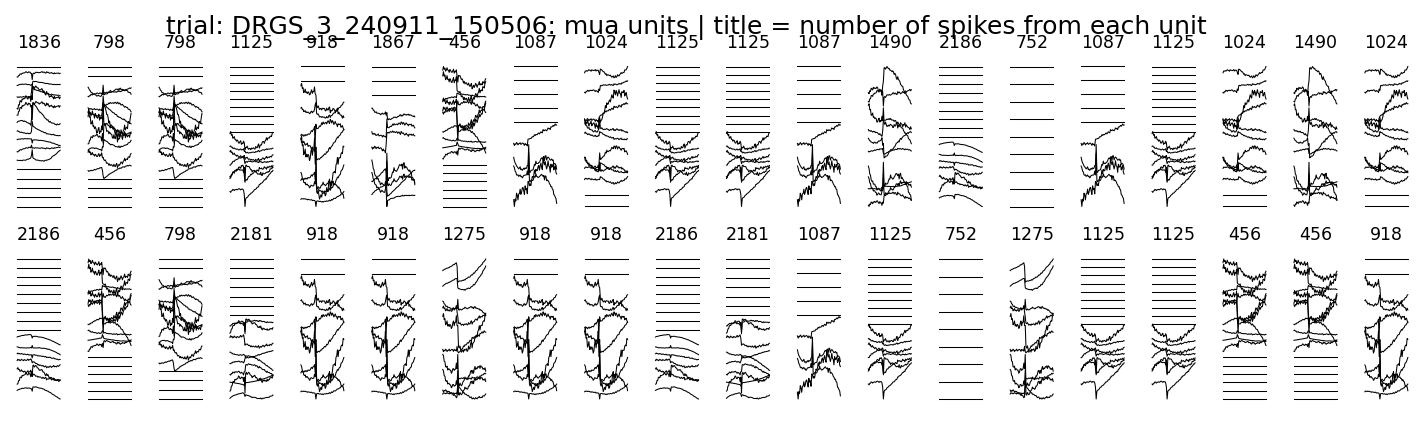

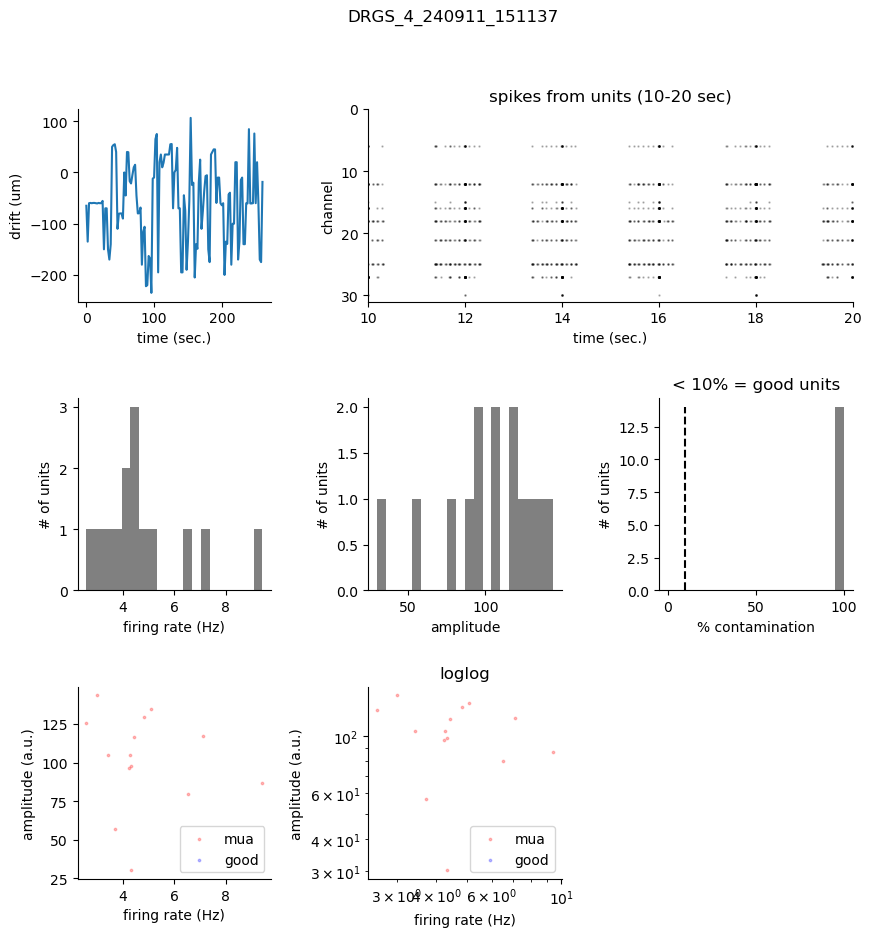

ERROR: could not plot units for DRGS_4_240911_151137, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\DRGS_5_240911_151925\DW323_DRGS_5_240911_151925_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ---------------------------------------

ERROR: could not plot units for DRGS_4_240911_151137, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on DRGS_5_240911_151925
|
|
|
|
|
|


kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 130/130 [00:09<00:00, 14.05it/s]
kilosort.run_kilosort: drift computed in  9.77s; total  9.91s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after drift correction
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    25.40 %
kilosort.run_kilosort: Memory:       64.88 %     |     31.10   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     2.12 %     |      0.17   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_k

<Figure size 1800x450 with 0 Axes>

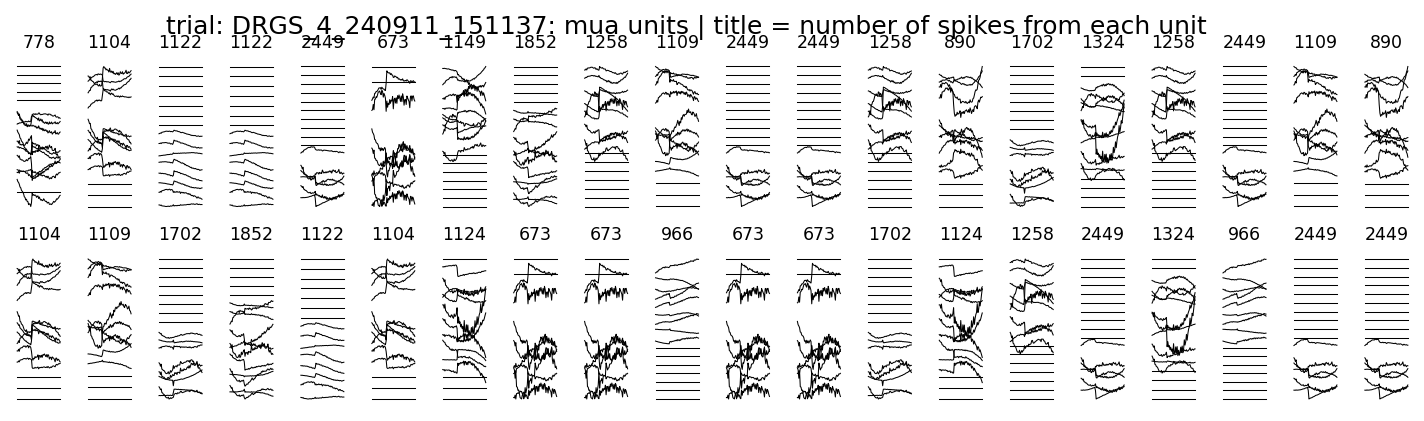

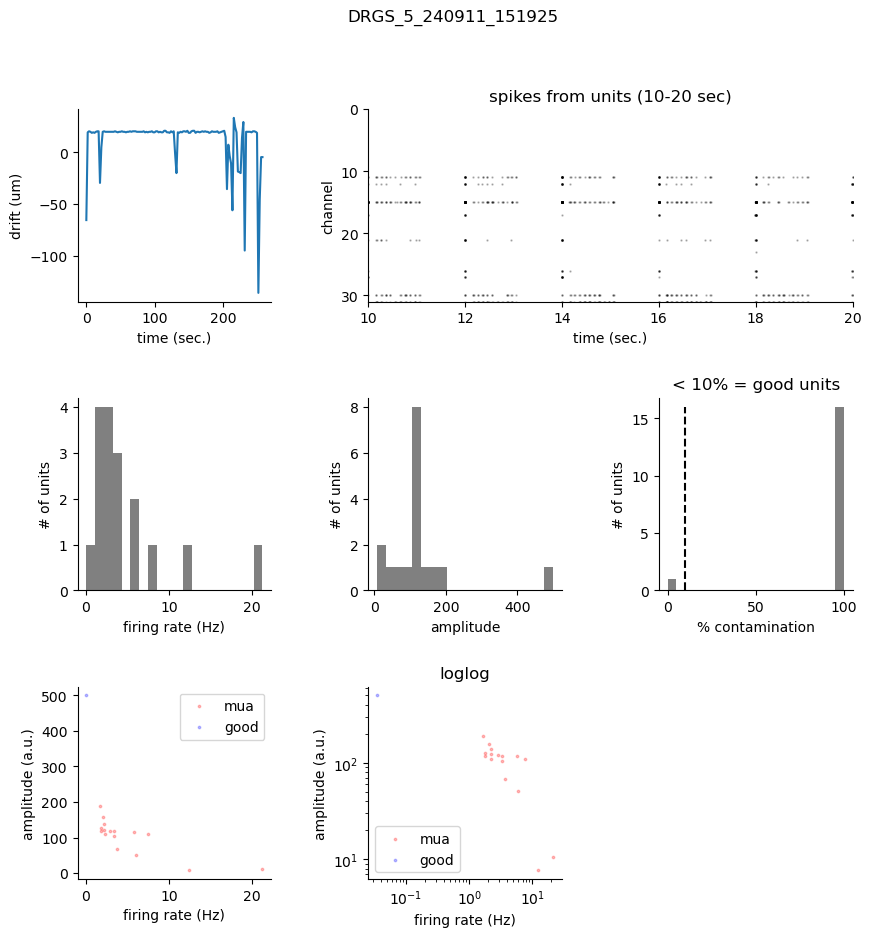

ERROR: could not plot units for DRGS_5_240911_151925, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\DRGS_6_240911_152522\DW323_DRGS_6_240911_152522_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ---------------------------------------

ERROR: could not plot units for DRGS_5_240911_151925, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on DRGS_6_240911_152522
|
|
|
|
|
|


kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 131/131 [00:09<00:00, 14.19it/s]
kilosort.run_kilosort: drift computed in  9.73s; total  9.88s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after drift correction
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    20.60 %
kilosort.run_kilosort: Memory:       64.86 %     |     31.09   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     2.12 %     |      0.17   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_k

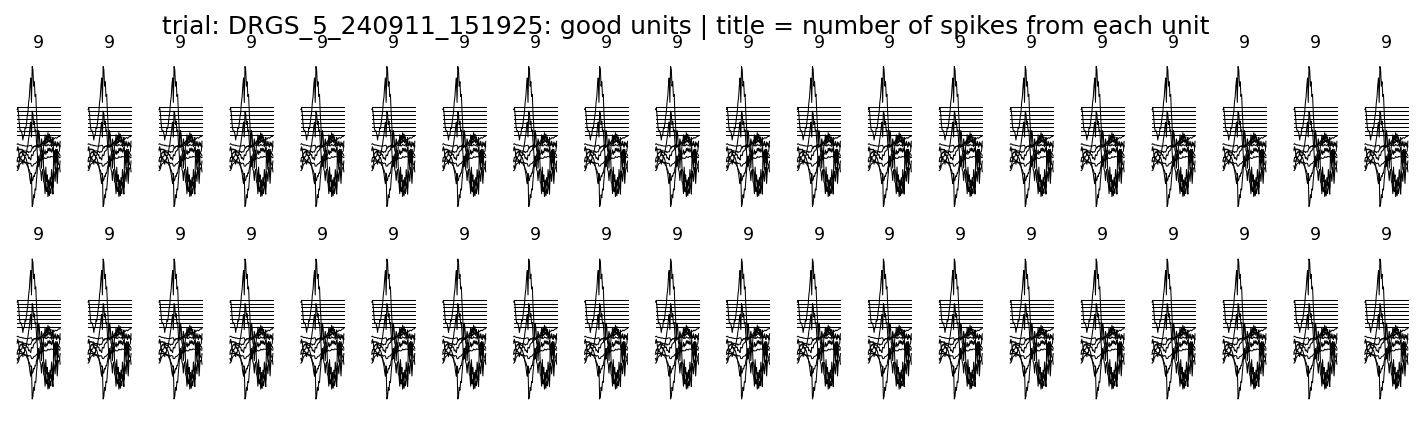

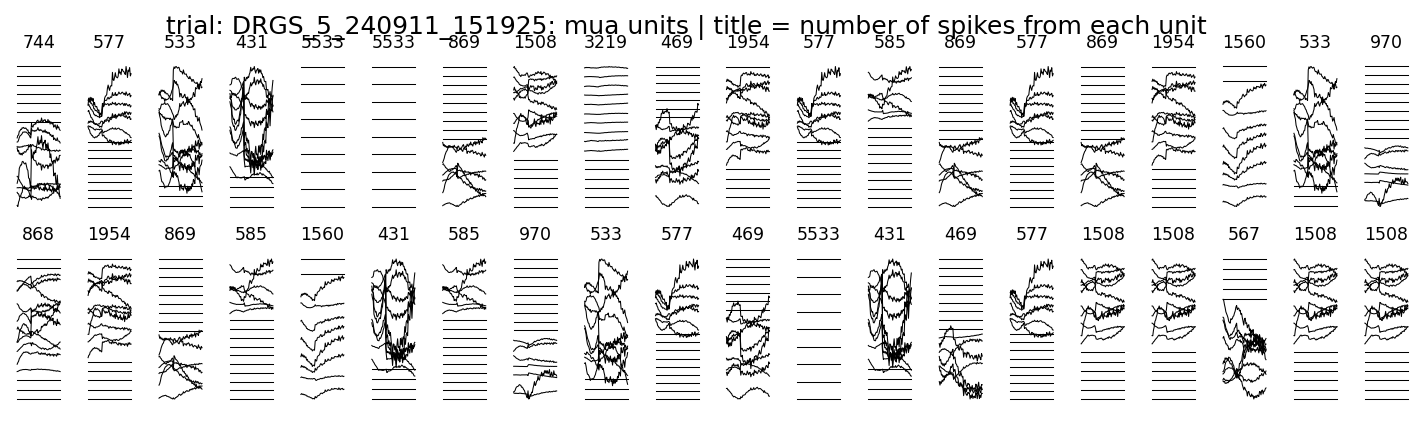

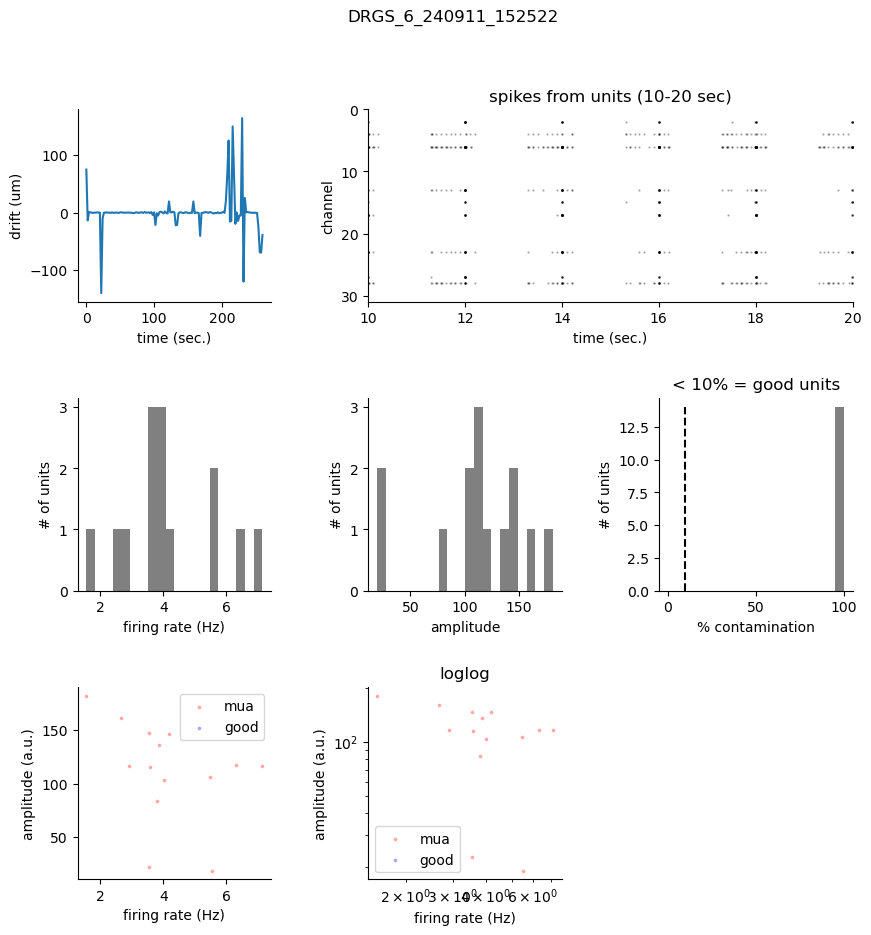

ERROR: could not plot units for DRGS_6_240911_152522, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\DRGS_7_240911_153255\DW323_DRGS_7_240911_153255_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ---------------------------------------

ERROR: could not plot units for DRGS_6_240911_152522, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on DRGS_7_240911_153255
|
|
|
|
|
|


kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.spikedetect: Re-computing universal templates from data.
kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 144/144 [00:10<00:00, 14.28it/s]
kilosort.run_kilosort: drift computed in  10.64s; total  10.81s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after drift correction
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    31.60 %
kilosort.run_kilosort: Memory:       64.38 %     |     30.86   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28  

<Figure size 1800x450 with 0 Axes>

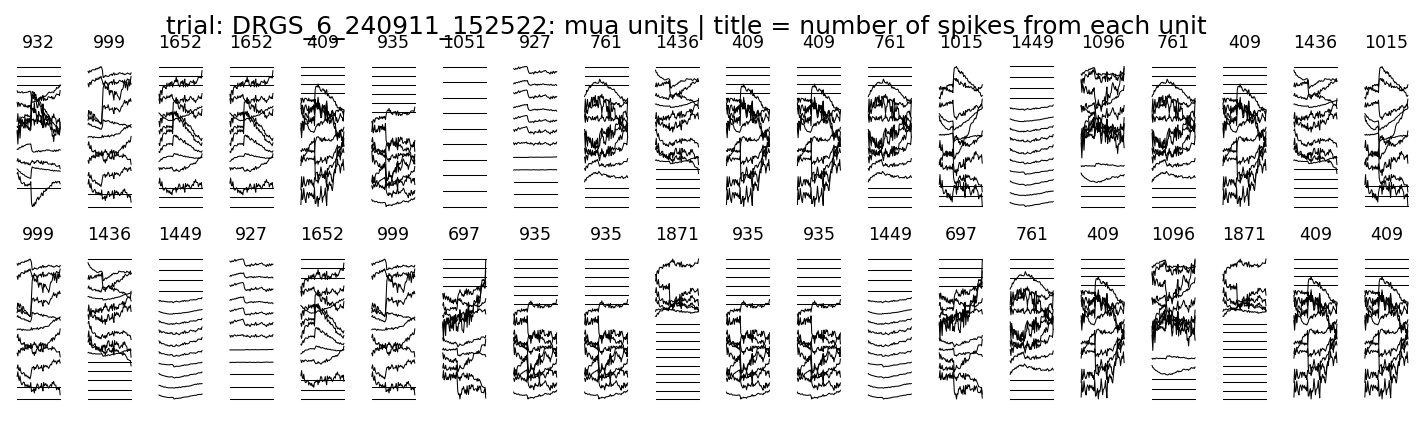

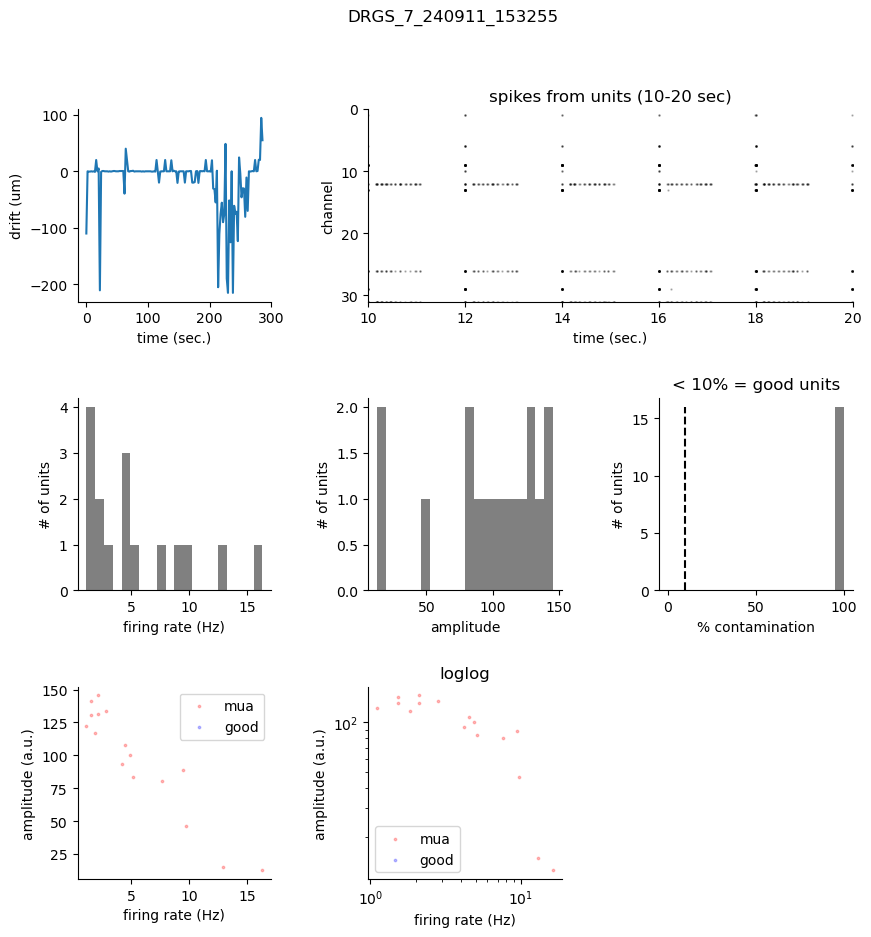

ERROR: could not plot units for DRGS_7_240911_153255, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\DRGS_8_240911_154319\DW323_DRGS_8_240911_154319_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ---------------------------------------

ERROR: could not plot units for DRGS_7_240911_153255, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on DRGS_8_240911_154319
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  0.20s; total  0.21s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    21.70 %
kilosort.run_kilosort: Memory:       64.47 %     |     30.90   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     2.12 %     |      0.17   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.spikedetect: Re-computing

<Figure size 1800x450 with 0 Axes>

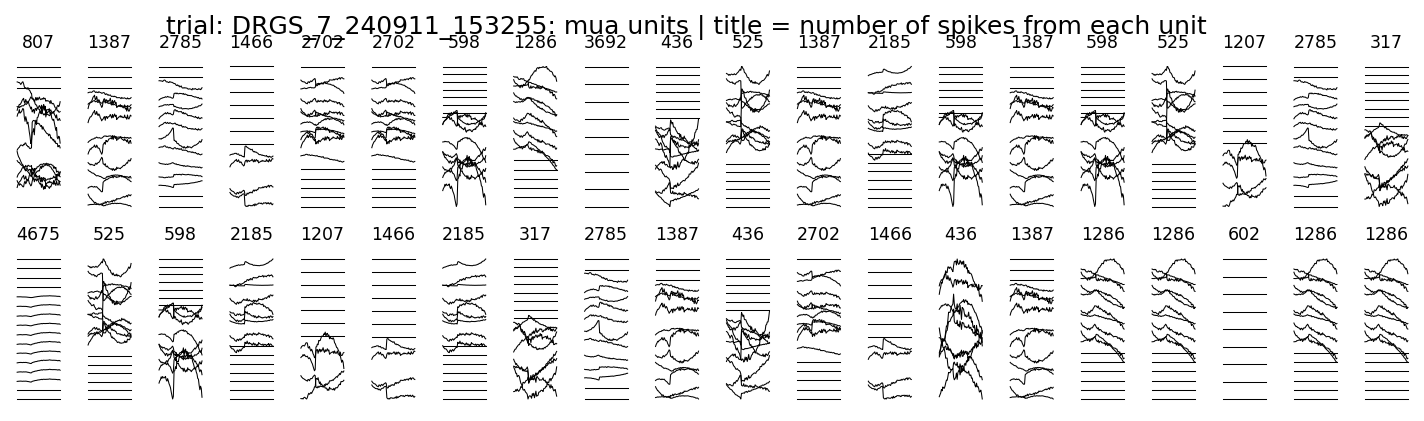

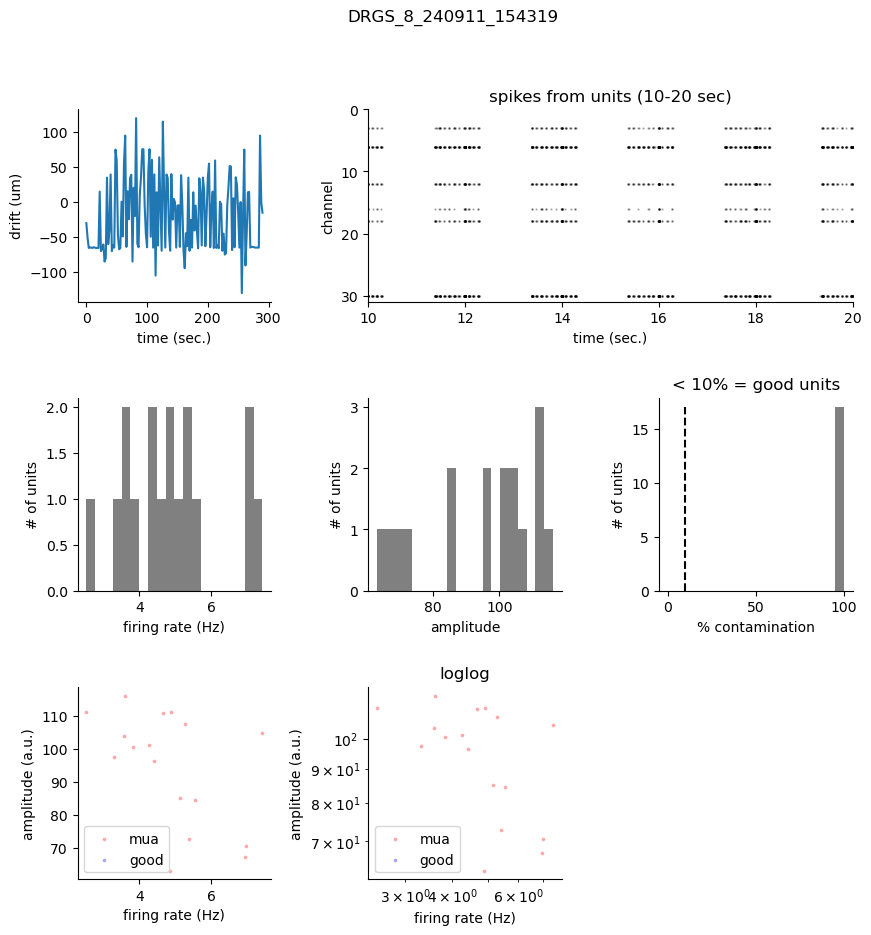

ERROR: could not plot units for DRGS_8_240911_154319, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\DRGS_9_240911_155057\DW323_DRGS_9_240911_155057_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ---------------------------------------

ERROR: could not plot units for DRGS_8_240911_154319, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on DRGS_9_240911_155057
|
|
|
|
|
|


kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 145/145 [00:10<00:00, 14.24it/s]
kilosort.run_kilosort: drift computed in  10.72s; total  10.89s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after drift correction
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    30.80 %
kilosort.run_kilosort: Memory:       63.95 %     |     30.65   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     2.12 %     |      0.17   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run

<Figure size 1800x450 with 0 Axes>

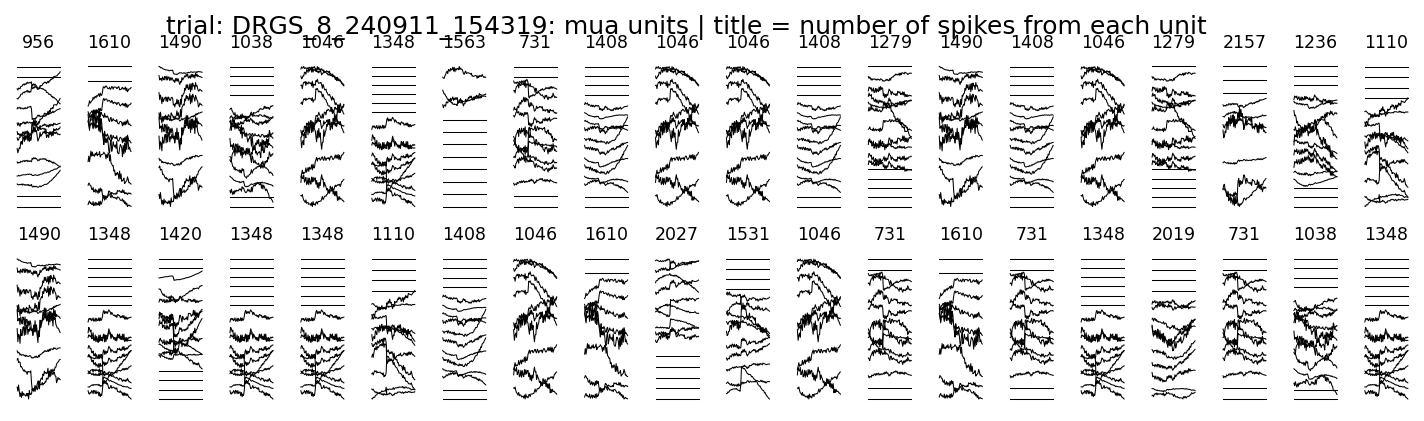

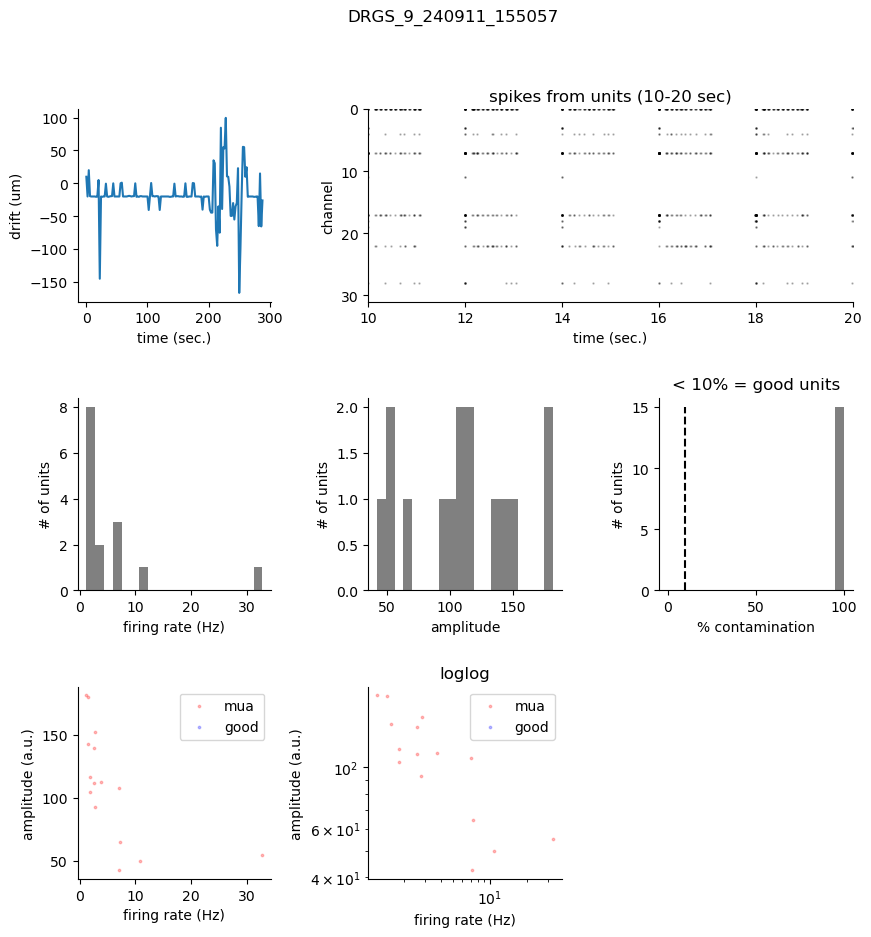

ERROR: could not plot units for DRGS_9_240911_155057, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\nninsertion_240911_130746\DW323_nninsertion_240911_130746_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -----------------------------

ERROR: could not plot units for DRGS_9_240911_155057, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on nninsertion_240911_130746
|
|
|
|
|
|


kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 44/44 [00:03<00:00, 14.23it/s]
kilosort.run_kilosort: drift computed in  3.46s; total  3.57s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after drift correction
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    25.50 %
kilosort.run_kilosort: Memory:       64.10 %     |     30.73   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     2.12 %     |      0.17   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kil


error processing data in folder: nninsertion_240911_130746

An unexpected error occurred:
n_samples=3 should be >= n_clusters=6.
|
|
|
|
|
|
Running kilosort on nn_seond_insertion_240911_144433
|
|
|
|
|
|

error processing data in folder: nn_seond_insertion_240911_144433

An unexpected error occurred:
n_samples=1 should be >= n_clusters=6.
|
|
|
|
|
|
Running kilosort on QST_2_240911_181341
|
|
|
|
|
|


kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\QST_2_240911_181341\DW323_QST_2_240911_181341_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: N samples: 5801728
kilos

<Figure size 1800x450 with 0 Axes>

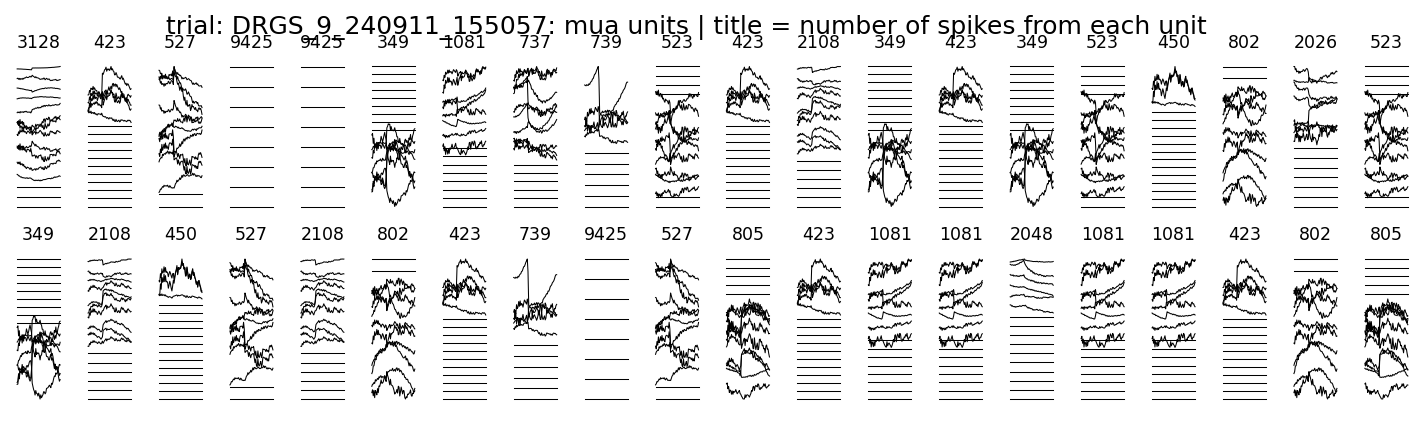

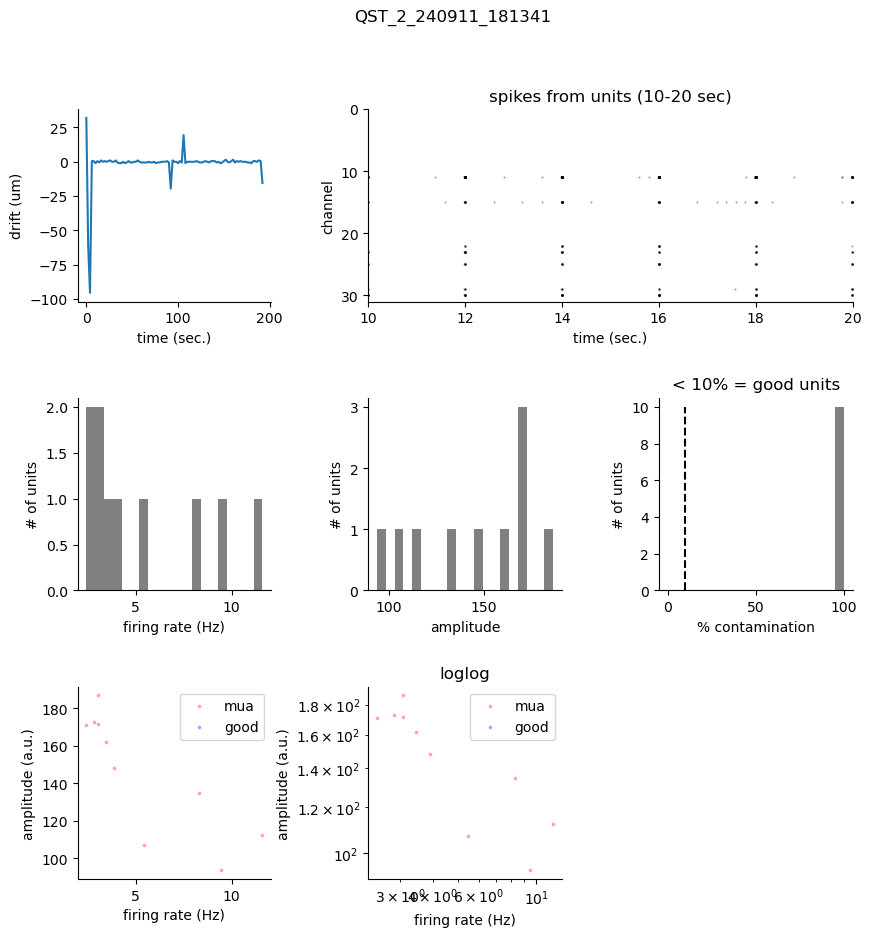

ERROR: could not plot units for QST_2_240911_181341, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\VF_1_240911_164342\DW323_VF_1_240911_164342_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
ki

ERROR: could not plot units for QST_2_240911_181341, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on VF_1_240911_164342
|
|
|
|
|
|


kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 122/122 [00:08<00:00, 14.26it/s]
kilosort.run_kilosort: drift computed in  9.04s; total  9.17s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after drift correction
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    25.40 %
kilosort.run_kilosort: Memory:       64.12 %     |     30.74   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     2.12 %     |      0.17   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_k

<Figure size 1800x450 with 0 Axes>

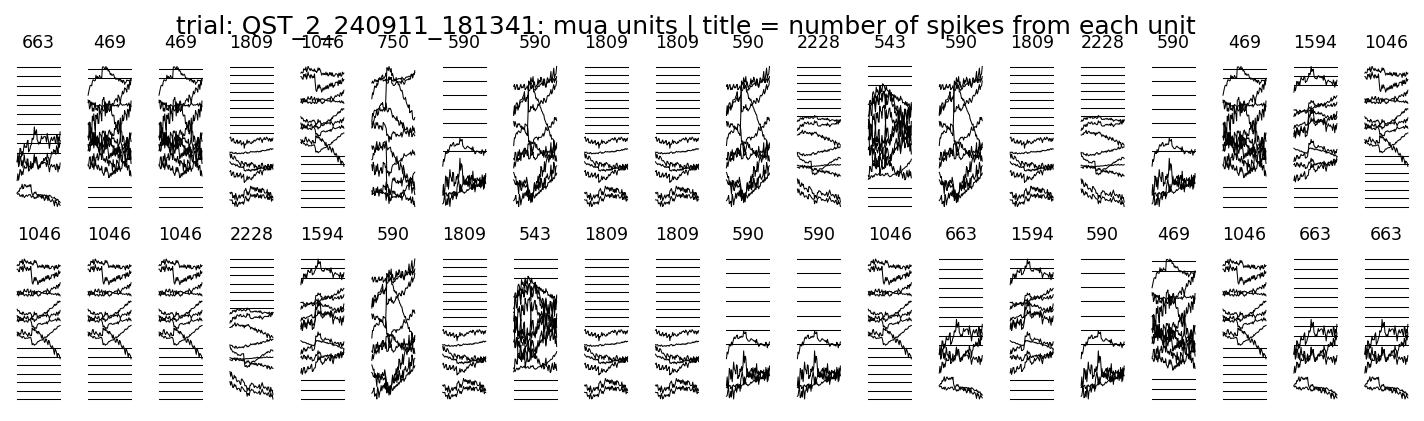

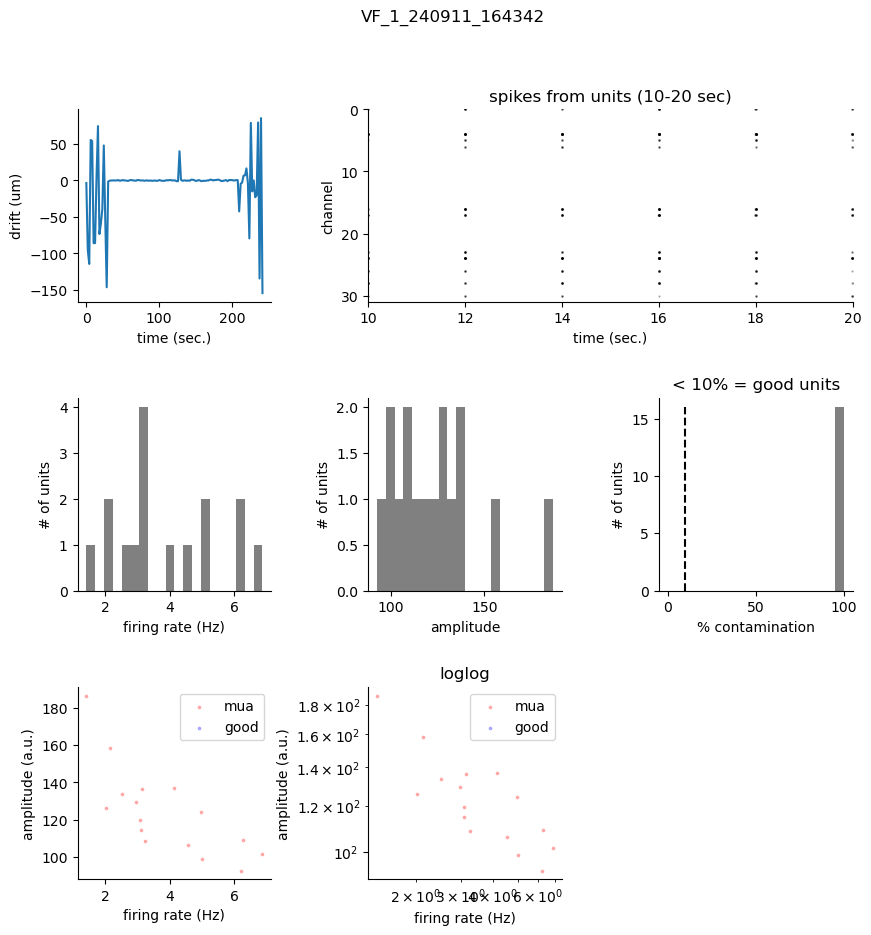

ERROR: could not plot units for VF_1_240911_164342, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\VF_2_240911_165039\DW323_VF_2_240911_165039_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
ki

ERROR: could not plot units for VF_1_240911_164342, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on VF_2_240911_165039
|
|
|
|
|
|


kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 122/122 [00:08<00:00, 14.23it/s]
kilosort.run_kilosort: drift computed in  9.08s; total  9.23s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after drift correction
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    25.90 %
kilosort.run_kilosort: Memory:       63.99 %     |     30.67   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     2.12 %     |      0.17   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_k

<Figure size 1800x450 with 0 Axes>

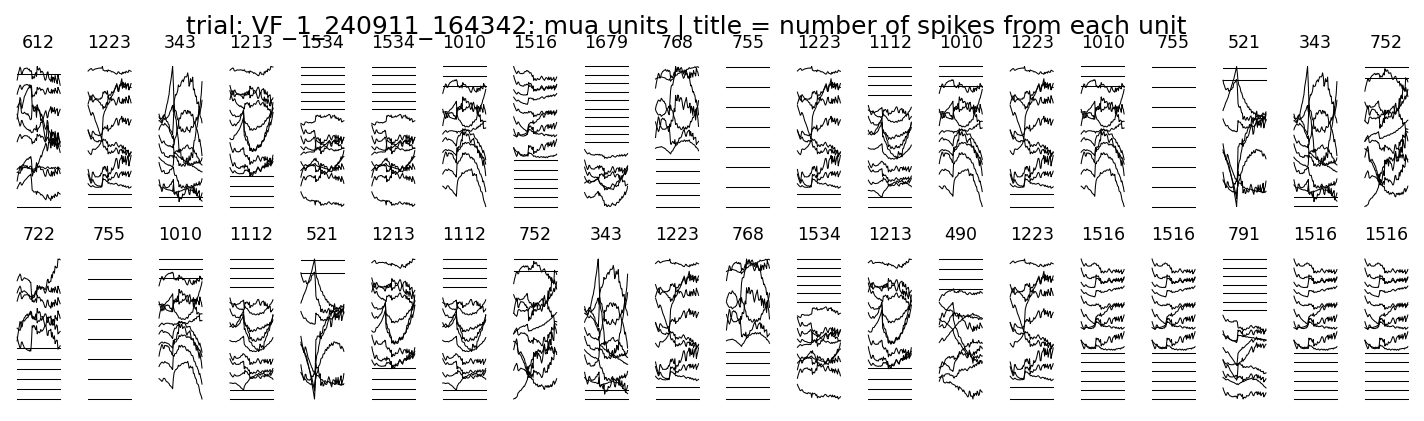

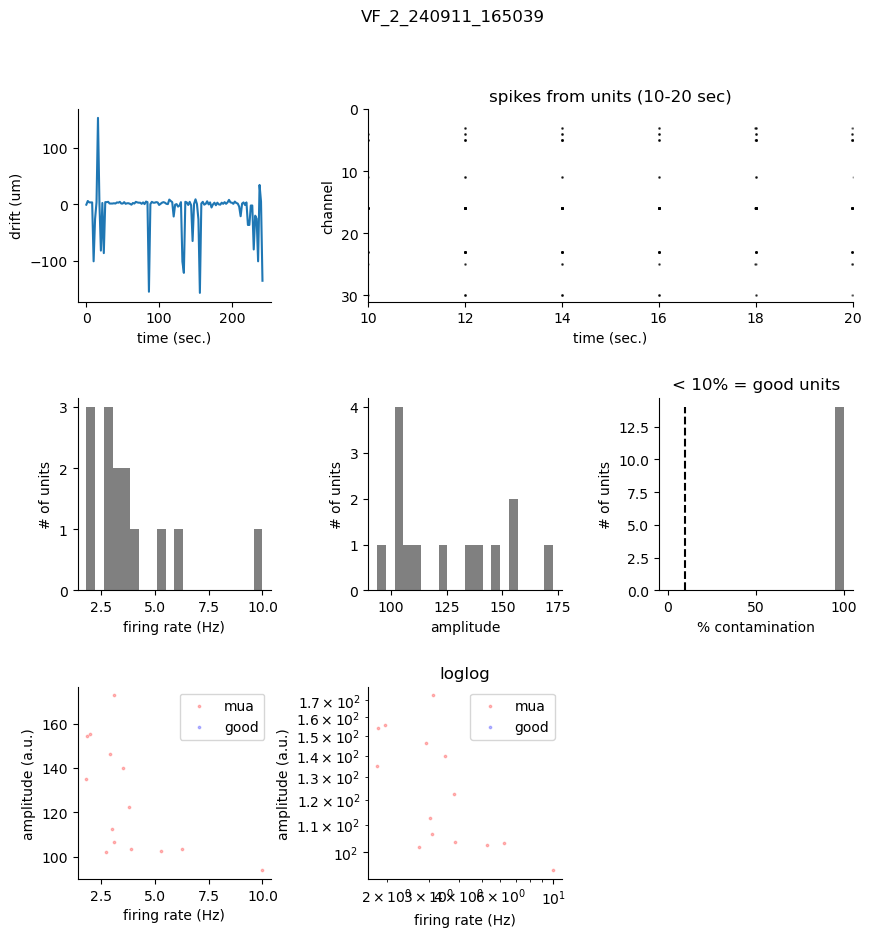

ERROR: could not plot units for VF_2_240911_165039, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\VF_3_240911_165617\DW323_VF_3_240911_165617_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
ki

ERROR: could not plot units for VF_2_240911_165039, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on VF_3_240911_165617
|
|
|
|
|
|


kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.spikedetect: Re-computing universal templates from data.
kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 122/122 [00:08<00:00, 14.18it/s]
kilosort.run_kilosort: drift computed in  9.13s; total  9.30s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after drift correction
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    25.60 %
kilosort.run_kilosort: Memory:       63.82 %     |     30.59   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /   

<Figure size 1800x450 with 0 Axes>

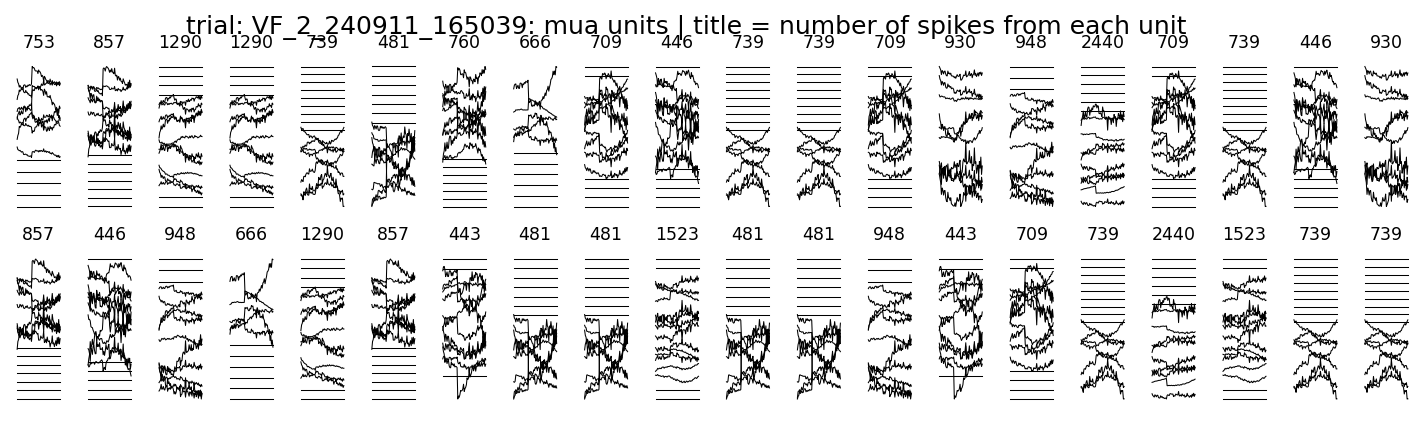

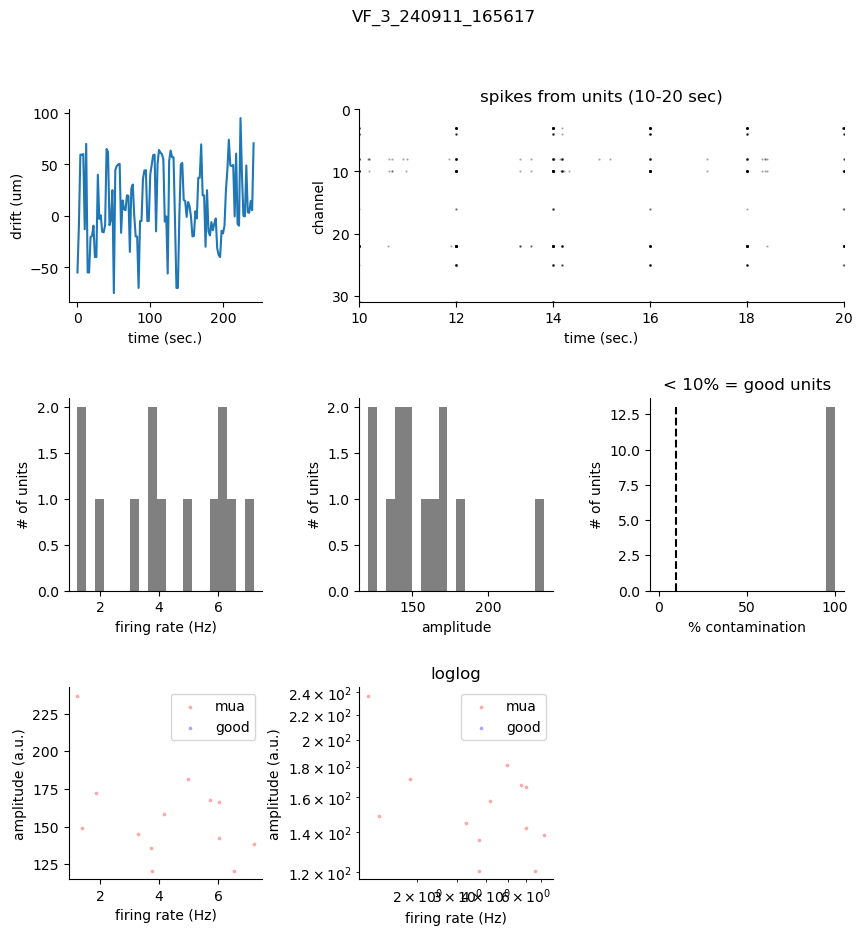

ERROR: could not plot units for VF_3_240911_165617, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\VF_4_240911_170446\DW323_VF_4_240911_170446_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
ki

ERROR: could not plot units for VF_3_240911_165617, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on VF_4_240911_170446
|
|
|
|
|
|


kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.spikedetect: Re-computing universal templates from data.
kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 124/124 [00:08<00:00, 14.19it/s]
kilosort.run_kilosort: drift computed in  9.25s; total  9.43s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after drift correction
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    18.90 %
kilosort.run_kilosort: Memory:       63.89 %     |     30.62   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_ki

<Figure size 1800x450 with 0 Axes>

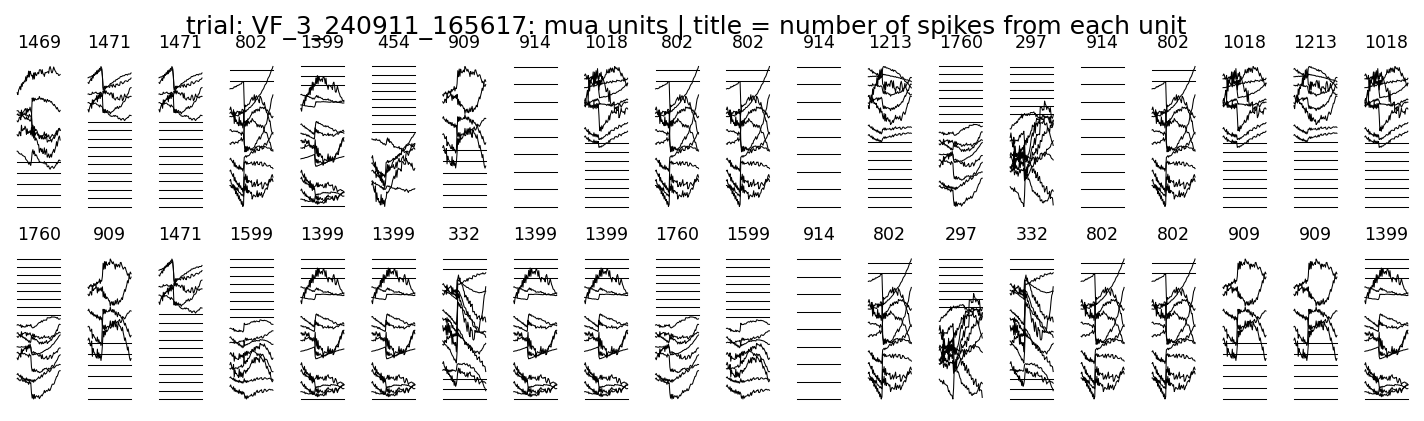

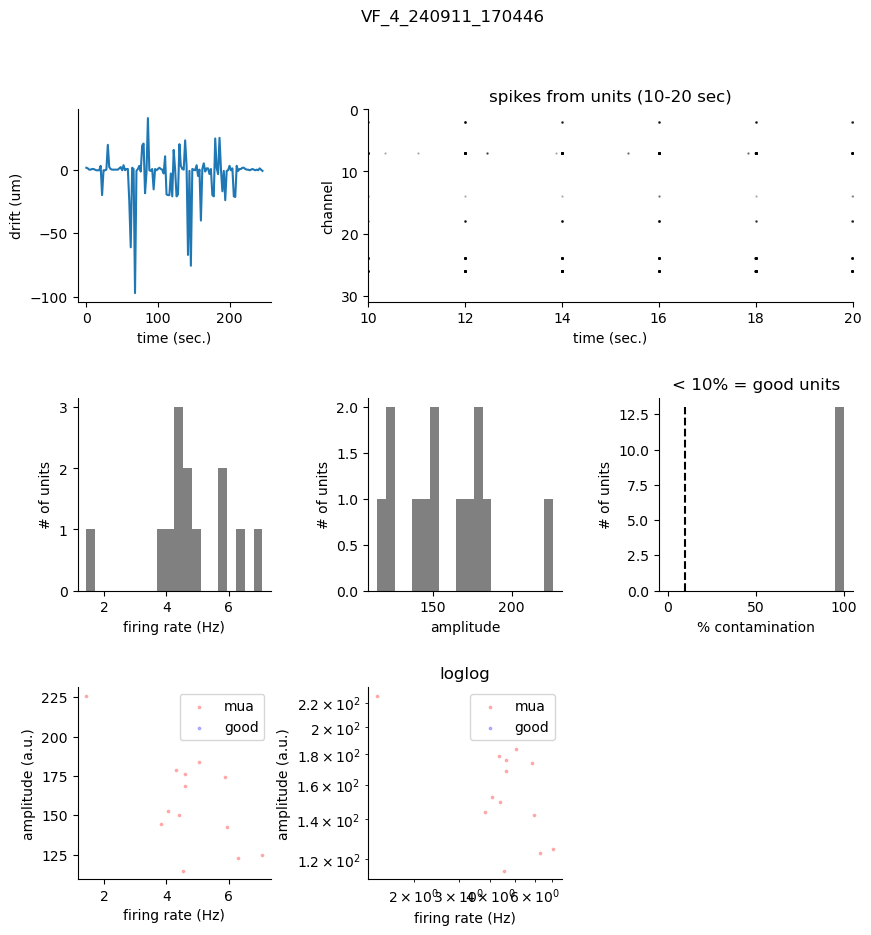

ERROR: could not plot units for VF_4_240911_170446, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\VF_5_240911_171014\DW323_VF_5_240911_171014_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
ki

ERROR: could not plot units for VF_4_240911_170446, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on VF_5_240911_171014
|
|
|
|
|
|


kilosort.run_kilosort: Memory:       65.68 %     |     31.48   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     2.12 %     |      0.17   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.spikedetect: Re-computing universal templates from data.
kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 122/122 [00:08<00:00, 13.79it/s]
kilosort.run_kilosort: drift computed in  9.40s; total  9.60s
kilosort.run_kilosort:  
kilosort.run_kiloso

<Figure size 1800x450 with 0 Axes>

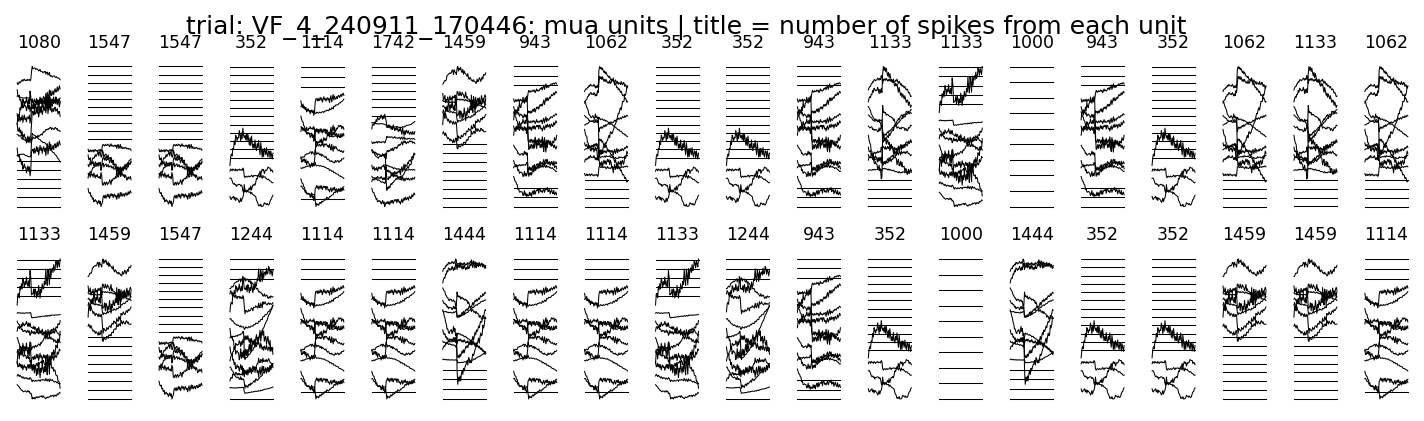

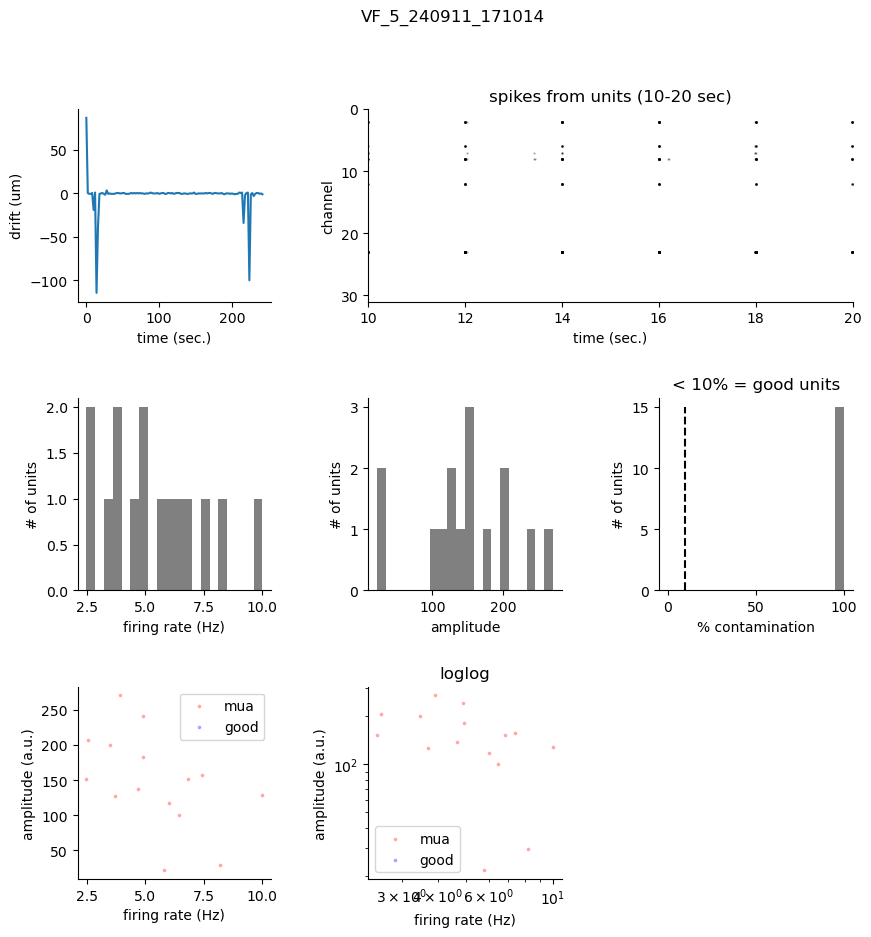

ERROR: could not plot units for VF_5_240911_171014, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\VF_6_240911_171505\DW323_VF_6_240911_171505_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
ki

ERROR: could not plot units for VF_5_240911_171014, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on VF_6_240911_171505
|
|
|
|
|
|


kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 124/124 [00:08<00:00, 14.23it/s]
kilosort.run_kilosort: drift computed in  9.21s; total  9.36s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after drift correction
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    30.70 %
kilosort.run_kilosort: Memory:       65.51 %     |     31.40   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     2.12 %     |      0.17   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_k

<Figure size 1800x450 with 0 Axes>

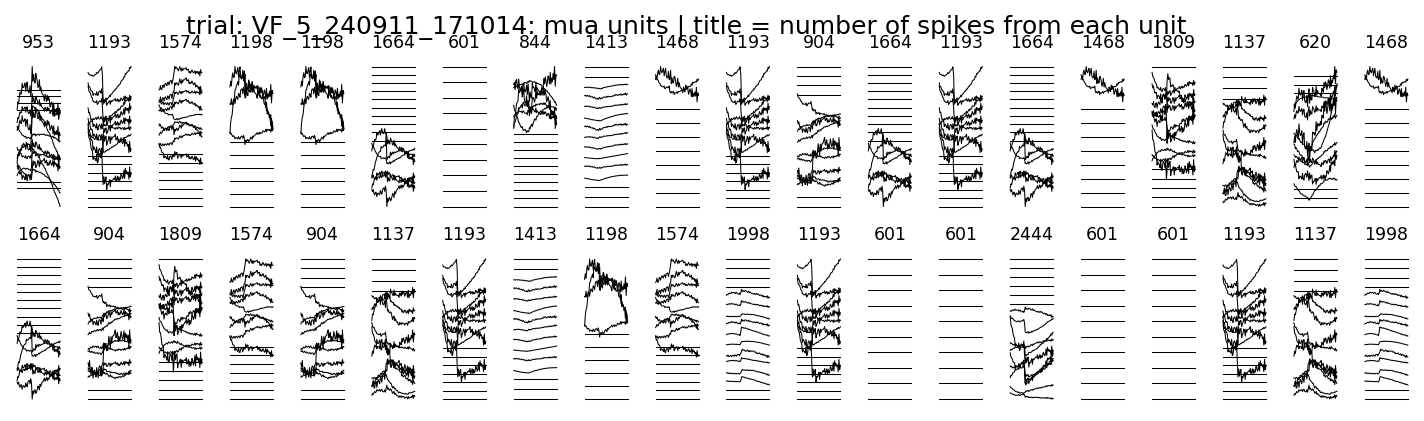

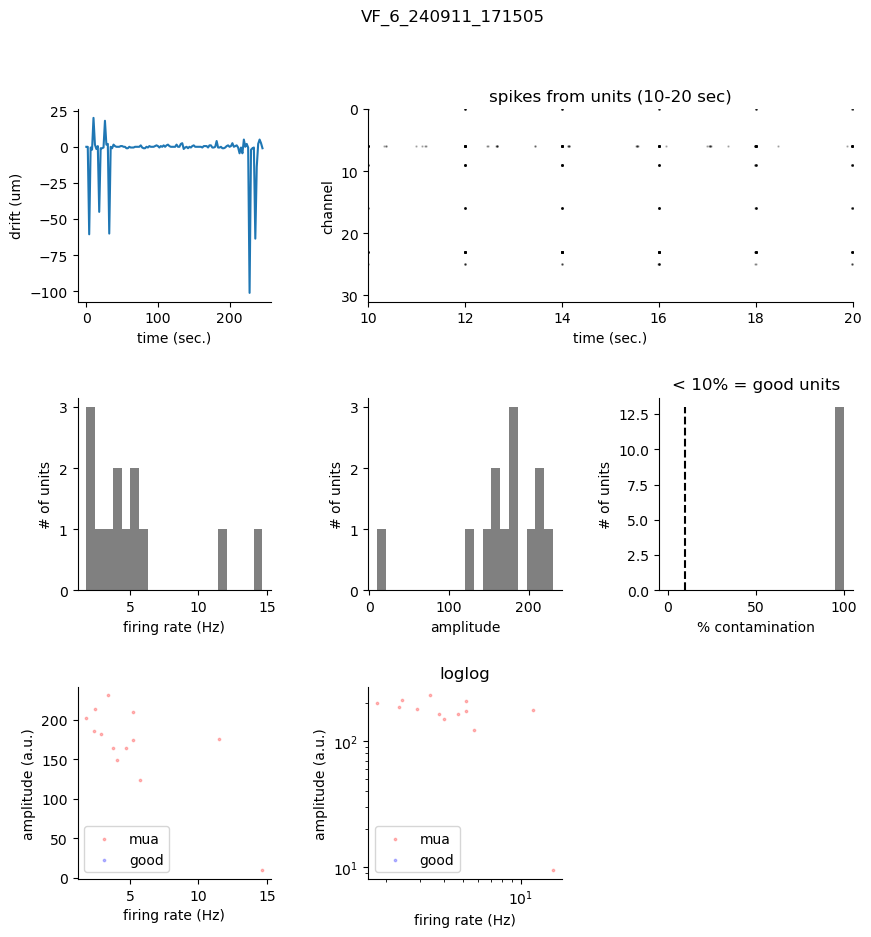

ERROR: could not plot units for VF_6_240911_171505, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.003 Initial Analysis, DW327\binary\VF_7_240911_180931\DW323_VF_7_240911_180931_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
ki

ERROR: could not plot units for VF_6_240911_171505, mua. skipping plot...
|
|
|
|
|
|
Running kilosort on VF_7_240911_180931
|
|
|
|
|
|


kilosort.spikedetect: Number of universal templates: 63
kilosort.spikedetect: Detecting spikes...
100%|██████████| 97/97 [00:06<00:00, 14.20it/s]
kilosort.run_kilosort: drift computed in  7.28s; total  7.43s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after drift correction
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    25.10 %
kilosort.run_kilosort: Memory:       65.32 %     |     31.31   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   15.98 %     |      1.28   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     2.12 %     |      0.17   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kil

<Figure size 1800x450 with 0 Axes>

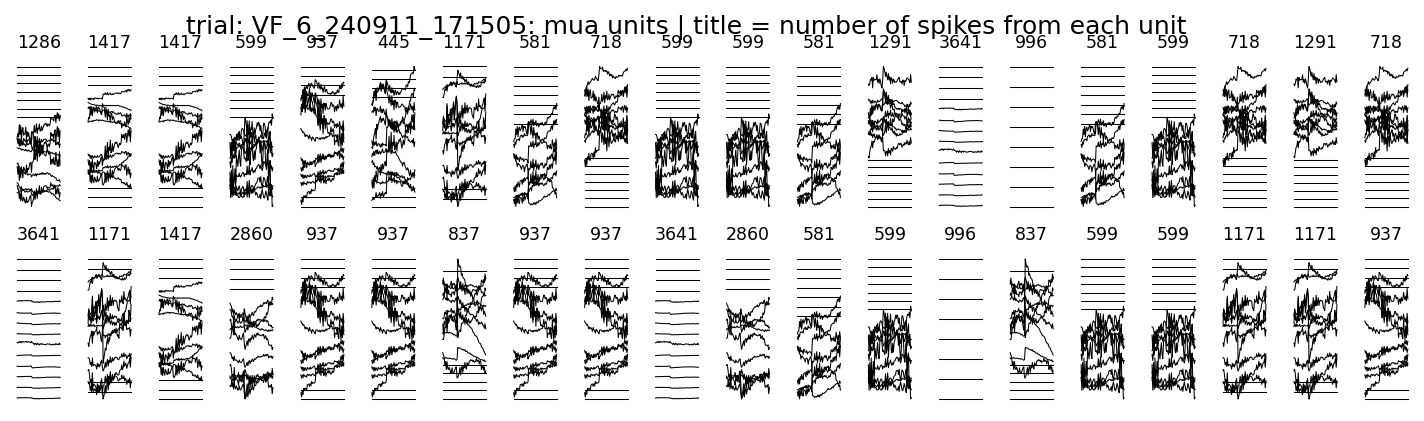

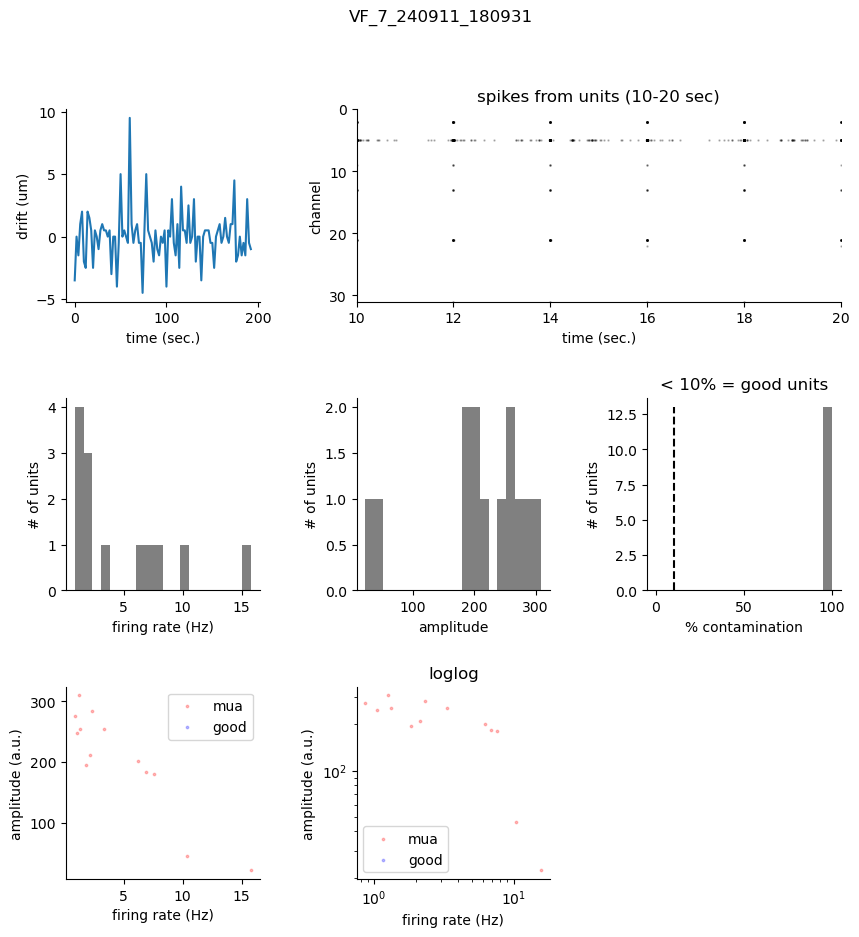

ERROR: could not plot units for VF_7_240911_180931, good. skipping plot...
ERROR: could not plot units for VF_7_240911_180931, mua. skipping plot...


<Figure size 1800x450 with 0 Axes>

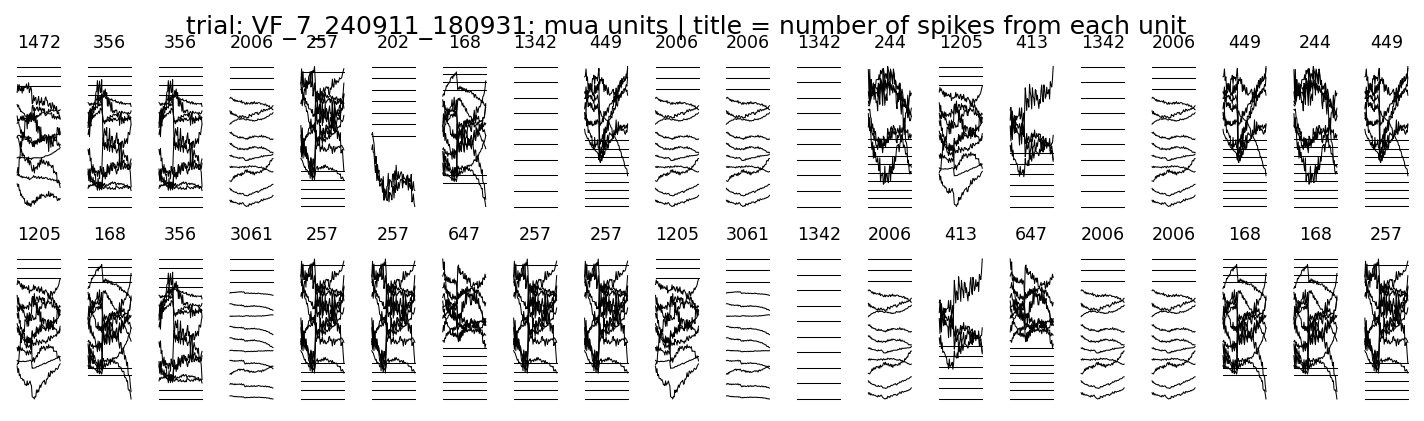

In [4]:
spikes.run_kilosort_trial_summary()

# ⏩ Import Kilosort Outputs (if they exist)

when kilosort is run, it creates a series of files saved next to the binary files.
use this method to import them. if there are no kilosort files, it will pass

In [5]:
spikes = Kilosort_wrapper(SAVE_DIRECTORY,PROBE_DIRECTORY)

Preparing Kilosort wrapper...


In [6]:
spikes.extract_kilosort_outputs()

- **`ops`**: Loads the Kilosort options dictionary, which includes parameters and processing information.
- **`cluster_amplitudes` & `contamination_percentage`**: Load cluster amplitudes and contamination percentages from TSV files.
- **`channel_mapping`**: Loads the mapping of electrode channels.
- **`templates`**: Loads the spike waveform templates.
- **`chan_best`**: Identifies the best (most representative) channel for each template by finding the channel with the maximum energy (sum of squared amplitudes).
- **`amplitudes`**: Loads the amplitudes of detected spikes.
- **`spike_times`**: Loads spike times, typically in sample indices.
- **`spike_clusters`**: Loads cluster assignments for each spike.
- **`firing_rates`**: Calculates the firing rate for each unit (cluster) by counting the number of spikes and normalizing by the total recording time.
- **`dshift`**: Extracts the drift shift values from the options dictionary, which indicates the movement of the recording probe over time.

In [7]:
st = spikes.kilosort_results["VF_8_241125_161626"]["spike_times"]
clu = spikes.kilosort_results["VF_8_241125_161626"]["spike_clusters"]
templates = spikes.kilosort_results["VF_8_241125_161626"]["templates"]
chan_map = spikes.kilosort_results["VF_8_241125_161626"]["channel_mapping"]
chan_best = spikes.kilosort_results["VF_8_241125_161626"]["chan_best"]

KeyError: 'VF_8_241125_161626'

# 📊 Example: Pretty Raster Plot

In [ ]:
# Define the specific time window in seconds
time_window_start = 10  # Start time in seconds
time_window_end = 20    # End time in seconds

# Convert the time window to indices
t_start_index = np.searchsorted(st, time_window_start * 30000)  # Convert to sample index
t_end_index = np.searchsorted(st, time_window_end * 30000)

# Extract spike times and corresponding channels within the time window
spike_times = st[t_start_index:t_end_index] / 30000.  # Convert to seconds
spike_clusters = clu[t_start_index:t_end_index]
spike_channels = chan_best[spike_clusters]

# Create a figure with a larger size for better visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Use a colormap to represent different units or clusters
clusters = np.unique(spike_clusters)
num_clusters = len(clusters)
cmap = plt.get_cmap('tab20', num_clusters)

# Map each cluster to a color
cluster_colors = {cluster: cmap(i) for i, cluster in enumerate(clusters)}

# Plot spikes for each cluster with its assigned color
for cluster in clusters:
    idx = spike_clusters == cluster
    ax.scatter(spike_times[idx], spike_channels[idx],
               s=1, color=cluster_colors[cluster], alpha=0.6)

# Set x-axis limits to the specified time window
ax.set_xlim([time_window_start, time_window_end])
ax.set_ylim([chan_map.max(), chan_map.min()])
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Channel', fontsize=14)
ax.set_title(f'Spikes from Units ({time_window_start}-{time_window_end} sec)\nTotal Units: {num_clusters}', fontsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


# 🔄Example: Calculate Firing Rate Per Unit During a Time Window

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assume st, clu, and chan_best are already defined

# Define the specific time window in seconds
time_window_start = 100  # Start time in seconds
time_window_end = 150    # End time in seconds

# Convert the time window to indices
t_start_index = np.searchsorted(st, time_window_start * 30000)  # Convert to sample index
t_end_index = np.searchsorted(st, time_window_end * 30000)

# Extract spike times and corresponding clusters within the time window
spike_times_window = st[t_start_index:t_end_index] / 30000.  # Convert to seconds
spike_clusters_window = clu[t_start_index:t_end_index]

# Calculate the duration of the time window
window_duration = time_window_end - time_window_start  # Duration in seconds

# Count the number of spikes per cluster within the time window
cluster_spike_counts = Counter(spike_clusters_window)

# Get all clusters present in the entire recording
all_clusters = np.unique(clu)

# Initialize firing rates with zero for all clusters
firing_rates = {cluster: 0 for cluster in all_clusters}

# Compute firing rates
for cluster in all_clusters:
    count = cluster_spike_counts.get(cluster, 0)
    firing_rates[cluster] = count / window_duration

# Create a DataFrame
firing_rates_df = pd.DataFrame(list(firing_rates.items()), columns=['Cluster', 'Firing Rate (Hz)'])

# Sort the DataFrame by firing rate
firing_rates_df = firing_rates_df.sort_values(by='Firing Rate (Hz)', ascending=False)

# Visualize the firing rates
plt.figure(figsize=(12, 6))
plt.bar(firing_rates_df['Cluster'], firing_rates_df['Firing Rate (Hz)'], color='skyblue')
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Firing Rate (Hz)', fontsize=14)
plt.title(f'Firing Rates of Clusters from {time_window_start} to {time_window_end} seconds', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
firing_rates_df